<a href="https://colab.research.google.com/github/hichemfelouat/my-codes-of-machine-learning/blob/master/Vision_Transformer_(ViT)_for_Image_Classification_(cifar10_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vision Transformer (ViT) for Image Classification (cifar10 dataset)**

**Author:** [Hichem Felouat](https://www.linkedin.com/in/hichemfelouat/)<br>

I have simplified the original ViT code found [**here**](https://colab.research.google.com/github/google-research/vision_transformer/blob/master/vit_jax.ipynb) to make it more accessible for everyone to understand and reuse in special projects. I also quoted the code written by Khalid Salama.



The Transformer architecture was proposed in the paper [Attention Is All You Need](https://arxiv.org/abs/1706.03762). It is a model that uses a mechanism called self-attention, which is neither a CNN nor an LSTM, and builds a Transformer model to outperform existing methods significantly. The results are much better than the existing methods.


Vision Transformer (ViT) is a model that applies the Transformer to the image classification task and was proposed in [An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale](https://arxiv.org/abs/2010.11929). The model architecture is almost the same as the original Transformer, but with a twist to allow images to be treated as input, just like natural language processing. Recently, Vision Transformers (ViT) have achieved highly competitive performance in benchmarks for several computer vision applications, such as image classification, object detection, and semantic image segmentation.

The paper [An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale](https://arxiv.org/abs/2010.11929) is proposed these steps to train a ViT :
1.   Split an image into patches.
2.   Flatten the patches.
3.   Produce lower-dimensional linear embeddings from the flattened patches.
4.   Add positional embeddings.
Feed the sequence as an input to a standard transformer encoder.
5.   Pretrain the model with image labels (fully supervised on a huge dataset).
6.   Finetune on the downstream dataset for image classification.

Training ViT requires a large amount of data. Transformers are less accurate with less data but become more accurate with more data. Its performance was acceptable when trained on ImageNet (1M images), great when pre-trained on ImageNet-21k (14M images), and state-of-the-art when pre-trained on Google’s internal JFT-300M dataset (300M images).

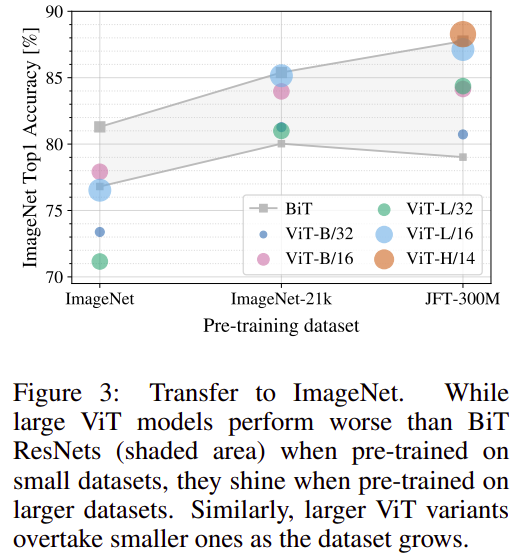





# **The Attention Mechanism from Scratch**

In [ ]:
from numpy import array
from numpy import random
from numpy import dot
from scipy.special import softmax

# encoder representations of four different words
word_1 = array([1, 0, 0])
word_2 = array([0, 1, 0])
word_3 = array([1, 1, 0])
word_4 = array([0, 0, 1])

# generating the weight matrices
random.seed(42) # to allow us to reproduce the same attention values
W_Q = random.randint(3, size=(3, 3))
W_K = random.randint(3, size=(3, 3))
W_V = random.randint(3, size=(3, 3))

print("W_Q : \n",W_Q)
print("W_K : \n",W_K)
print("W_V : \n",W_V)


W_Q : 
 [[2 0 2]
 [2 0 0]
 [2 1 2]]
W_K : 
 [[2 2 2]
 [0 2 1]
 [0 1 1]]
W_V : 
 [[1 1 0]
 [0 1 1]
 [0 0 0]]


In [ ]:
# generating the queries, keys and values
query_1 = word_1 @ W_Q
key_1   = word_1 @ W_K
value_1 = word_1 @ W_V
print("query_1 : \n",query_1)
print("key_1   : \n",key_1)
print("value_1 : \n",value_1)

query_2 = word_2 @ W_Q
key_2   = word_2 @ W_K
value_2 = word_2 @ W_V
 
query_3 = word_3 @ W_Q
key_3   = word_3 @ W_K
value_3 = word_3 @ W_V
 
query_4 = word_4 @ W_Q
key_4   = word_4 @ W_K
value_4 = word_4 @ W_V


query_1 : 
 [2 0 2]
key_1   : 
 [2 2 2]
value_1 : 
 [1 1 0]


In [ ]:
# scoring the first query vector against all key vectors
scores = array([dot(query_1, key_1), dot(query_1, key_2), 
                  dot(query_1, key_3), dot(query_1, key_4)])
print("scores : \n",scores)

# computing the weights by a softmax operation
weights = softmax(scores / key_1.shape[0] ** 0.5)
print("weights : \n",weights)

# computing the attention by a weighted sum of the value vectors
attention = (weights[0] * value_1) + (weights[1] * value_2) + 
                      (weights[2] * value_3) + (weights[3] * value_4)
print("attention : \n",attention)

scores : 
 [ 8  2 10  2]
weights : 
 [0.23608986 0.00738988 0.74913039 0.00738988]
attention : 
 [0.98522025 1.74174051 0.75652026]


In [ ]:
from numpy import array
from numpy import random
from numpy import dot
from scipy.special import softmax
 
# encoder representations of four different words
word_1 = array([1, 0, 0])
word_2 = array([0, 1, 0])
word_3 = array([1, 1, 0])
word_4 = array([0, 0, 1])
 
# stacking the word embeddings into a single array
words = array([word_1, word_2, word_3, word_4])
 
# generating the weight matrices
random.seed(42)
W_Q = random.randint(3, size=(3, 3))
W_K = random.randint(3, size=(3, 3))
W_V = random.randint(3, size=(3, 3))
 
# generating the queries, keys and values
Q = words @ W_Q
K = words @ W_K
V = words @ W_V
 
# scoring the query vectors against all key vectors
scores = Q @ K.transpose()
 
# computing the weights by a softmax operation
weights = softmax(scores / K.shape[1] ** 0.5, axis=1)
 
# computing the attention by a weighted sum of the value vectors
attention = weights @ V
 
print(attention)


[[0.98522025 1.74174051 0.75652026]
 [0.90965265 1.40965265 0.5       ]
 [0.99851226 1.75849334 0.75998108]
 [0.99560386 1.90407309 0.90846923]]


# **Image classification with Vision Transformer**

# **Prepare the data**

170508288/170498071 [==============================] - 11s 0us/step
X_train :  (50000, 32, 32, 3)   X_test :  (10000, 32, 32, 3)


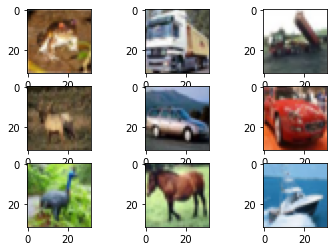

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load The Dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# summarize loaded dataset
print("X_train : ",X_train.shape,"  X_test : ",X_test.shape)

# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i])
# show the figure
plt.show()


# **Implement patch creation as a layer**

In [ ]:
from tensorflow.keras import layers

image_size = 64  # Resize input images to the desired size
patch_size = 8   # Size of the patches to be extract from the input images

class Patches(layers.Layer):
    #---------------------------------------------------------------------------
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size
    #---------------------------------------------------------------------------
    def call(self, images):
        batch_size = tf.shape(images)[0]
        # Extract patches
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
            )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches
    #---------------------------------------------------------------------------

print("Done ...")


Done ...


Image size         :  64  X  64
Patch size         :  8  X  8
patches shape      :  (1, 64, 192)
patches [0] shape  :  (64, 192)
Patches per image  :  64
Elements per patch :  192
-----------------------------------------------------------------------


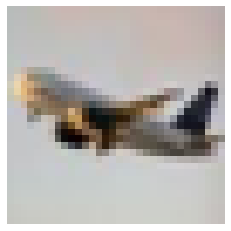

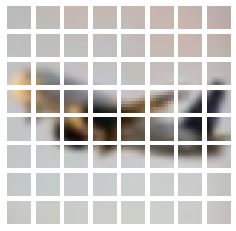

In [ ]:
# Let's display patches for a sample image

# Choose a random image from : X_train
image = X_train[np.random.choice(range(X_train.shape[0]))]

#-------------------------------------------------------------------------------
# Plot the image
plt.figure(figsize=(4, 4))
plt.imshow(image.astype("uint8"))
plt.axis("off")

#-------------------------------------------------------------------------------
# Resize image to : image_size * image_size
resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size) )

#-------------------------------------------------------------------------------
# Extract patches using the Patches class
patches = Patches(patch_size)(resized_image)

print("Image size         : ",image_size," X ",image_size )
print("Patch size         : ", patch_size," X ",patch_size)
print("patches shape      : ",patches.shape)
print("patches [0] shape  : ",patches[0].shape)
print("Patches per image  : ",patches.shape[1])

# We have RGB images (3 layers) and the patch size is (patch_size*patch_size), 
# so the elements per patch are : for one layer = patch_size*patch_size. 
# for the 3 layers (RGB) = 3*patch_size*patch_size
print("Elements per patch : ",patches.shape[-1])

print("-----------------------------------------------------------------------")
# Display patches
n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")


In [ ]:
"""
Implement the patch encoding layer
The PatchEncoder layer will linearly transform a patch by projecting it 
into a vector of size projection_dim. In addition, it adds a learnable 
position embedding to the projected vector.
"""
num_patches = (image_size // patch_size) ** 2
print("num_patches        : ",num_patches)

# projection_dim : number of dimensions in the embedding space
projection_dim = 64

class PatchEncoder(layers.Layer):
    #---------------------------------------------------------------------------
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()

        self.num_patches = num_patches
        # Flatten the patches
        self.projection  = layers.Dense(units=projection_dim)
        # Produce lower-dimensional linear embeddings from the flattened patches
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
            )
    #---------------------------------------------------------------------------
    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        # After the initial embedding, the positional encoding is additive, 
        # rather than a multiplication, so it doesn't change the shape of things.
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

#-------------------------------------------------------------------------------
patch_enc = PatchEncoder(num_patches, projection_dim)(patches)
print("patches shape      : ",patches.shape)
print("Elements per patch : ",patches.shape[-1])
print("patch_enc shape    : ",patch_enc.shape)


num_patches        :  64
patches shape      :  (1, 64, 192)
Elements per patch :  192
patch_enc shape    :  (1, 64, 64)


# **ViT Model**

[An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale](https://arxiv.org/abs/2010.11929)

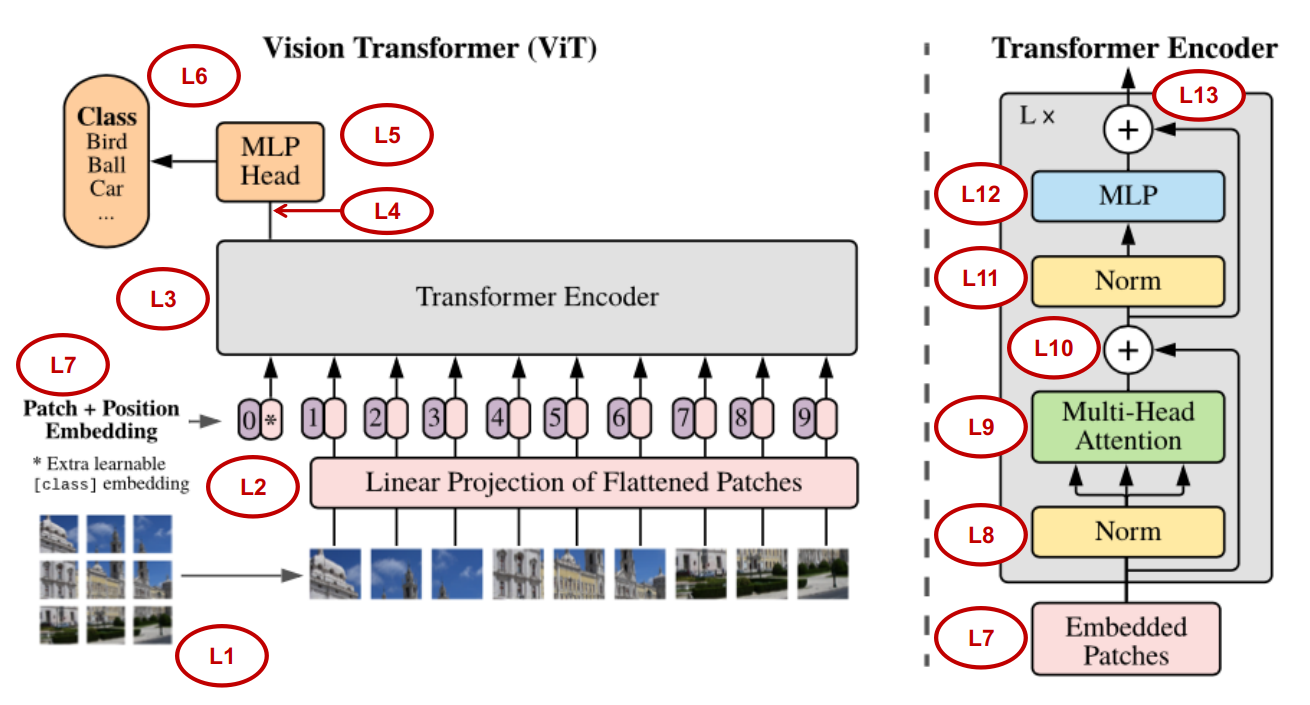


# **Build the ViT model**

In [ ]:
# Data augmentation (to increase the amount of data)
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
    )

# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(X_train)
print("Done ...")


Done ...


In [ ]:
#-------------------------------------------------------------------------------
def MLP(x, hidden_units, dropout_rate):
    # L5 + L12
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x
    
#-------------------------------------------------------------------------------
def Transformer_Encoder(nb_transformer_layers, encoded_patches):
    # Create multiple layers of the Transformer block
    for _ in range(nb_transformer_layers):
        # L8 : Layer normalization 1
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # L9 : Create a multi-head attention layer
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # L10 : Skip connection 1
        x2 = layers.Add()([attention_output, encoded_patches])
        # L11 : Layer normalization 2
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)

        #-----------------------------------------------------------------------
        # L12 : MLP
        x3 = MLP(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # L13 : Skip connection 2
        encoded_patches = layers.Add()([x3, x2])
    
    return encoded_patches

#-------------------------------------------------------------------------------
print("Done ...")


Done ...


In [ ]:
#-------------------------------------------------------------------------------
input_shape = (32, 32, 3)
num_classes = 10
nb_transformer_layers = 8
num_heads = 4

transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers

mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

#-------------------------------------------------------------------------------
def create_my_ViT_classifier():
    # Input image
    inputs = layers.Input(shape=input_shape)
    # Augment data
    augmented = data_augmentation(inputs)

    # L1 : Create patches
    patches = Patches(patch_size)(augmented)
    # L2 + L7: Encode patches
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)
    # L3 : Transformer Encoder block
    encoded_patches = Transformer_Encoder(nb_transformer_layers, encoded_patches)

    # L4 : Create a [batch_size, projection_dim] tensor
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)

    # L5 : Add MLP Head
    features = MLP(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # L6 : Classify outputs
    logits = layers.Dense(num_classes)(features)

    # Create the Keras model
    model = keras.Model(inputs=inputs, outputs=logits)

    return model
#-------------------------------------------------------------------------------
my_ViT_model = create_my_ViT_classifier()

# The model’s summary() method displays all the model’s layers
print(my_ViT_model.summary())


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 data_augmentation (Sequential)  (None, 64, 64, 3)   7           ['input_3[0][0]']                
                                                                                                  
 patches_3 (Patches)            (None, None, 192)    0           ['data_augmentation[2][0]']      
                                                                                                  
 patch_encoder_3 (PatchEncoder)  (None, 64, 64)      16448       ['patches_3[0][0]']              
                                                                                            

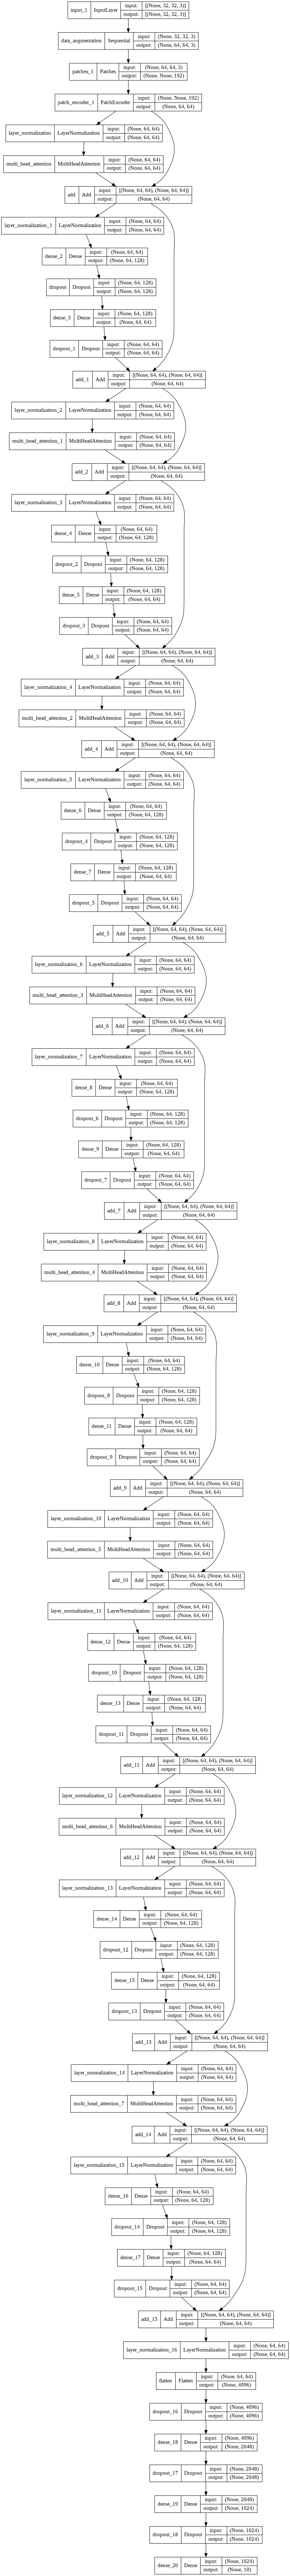

In [ ]:
# Plot the model
from tensorflow.keras.utils import plot_model
plot_model(my_ViT_model, show_shapes=True)


In [ ]:
"""
TensorFlow Addons is a repository of contributions that conform to 
well-established API patterns, but implement new functionality not available 
in core TensorFlow. TensorFlow natively supports a large number of operators, 
layers, metrics, losses, and optimizers. However, in a fast moving field like ML, 
there are many interesting new developments that cannot be integrated into 
core TensorFlow (because their broad applicability is not yet clear, or it is 
mostly used by a smaller subset of the community).
"""
# https://www.tensorflow.org/addons/overview
!pip install -U tensorflow-addons


     |████████████████████████████████| 1.1 MB 5.2 MB/s 


In [ ]:
learning_rate = 0.001
weight_decay  = 0.0001
batch_size    = 64
num_epochs    = 50

# Compiling the model
"""
optimizer = keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, 
                                  beta_2=0.999, clipvalue=1.0)
my_ViT_model.compile(loss="sparse_categorical_crossentropy", optimizer= optimizer, metrics=["accuracy"])
"""
import tensorflow_addons as tfa
optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

my_ViT_model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

# Training the model 
history = my_ViT_model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))
# history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)


Epoch 1/50
782/782 [==============================] - 109s 122ms/step - loss: 1.8889 - accuracy: 0.3383 - top-5-accuracy: 0.8336 - val_loss: 1.4224 - val_accuracy: 0.4794 - val_top-5-accuracy: 0.9254
Epoch 2/50
782/782 [==============================] - 94s 121ms/step - loss: 1.5293 - accuracy: 0.4514 - top-5-accuracy: 0.9077 - val_loss: 1.3012 - val_accuracy: 0.5315 - val_top-5-accuracy: 0.9408
Epoch 3/50
782/782 [==============================] - 94s 121ms/step - loss: 1.3818 - accuracy: 0.5083 - top-5-accuracy: 0.9276 - val_loss: 1.1437 - val_accuracy: 0.5922 - val_top-5-accuracy: 0.9554
Epoch 4/50
782/782 [==============================] - 94s 120ms/step - loss: 1.2722 - accuracy: 0.5486 - top-5-accuracy: 0.9410 - val_loss: 1.0916 - val_accuracy: 0.6049 - val_top-5-accuracy: 0.9612
Epoch 5/50
782/782 [==============================] - 94s 120ms/step - loss: 1.1950 - accuracy: 0.5799 - top-5-accuracy: 0.9491 - val_loss: 1.0122 - val_accuracy: 0.6422 - val_top-5-accuracy: 0.9660
Epoc

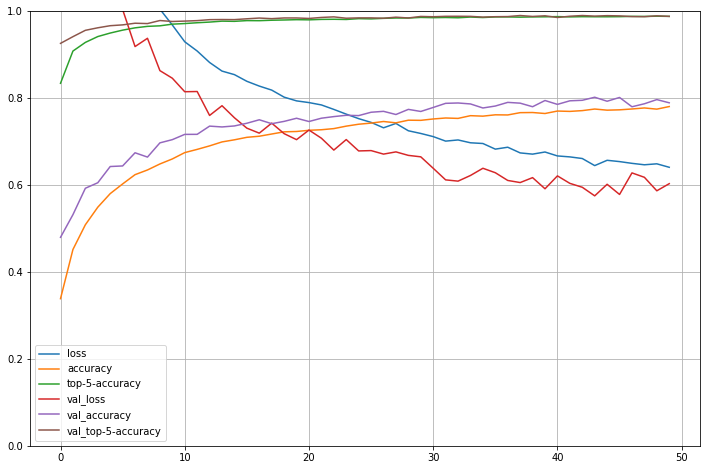

313/313 [==============================] - 12s 37ms/step - loss: 0.6028 - accuracy: 0.7887 - top-5-accuracy: 0.9875
Loss           :  0.6027666330337524
accuracy       :  0.7886999845504761
top-5-accuracy :  0.987500011920929


In [ ]:
# plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluate the model
model_evaluate = my_ViT_model.evaluate(X_test, y_test)
print("Loss           : ",model_evaluate[0])
print("accuracy       : ",model_evaluate[1])
print("top-5-accuracy : ",model_evaluate[2])


Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1000
           1       0.94      0.81      0.87      1000
           2       0.83      0.66      0.73      1000
           3       0.67      0.59      0.62      1000
           4       0.81      0.73      0.77      1000
           5       0.69      0.75      0.72      1000
           6       0.74      0.90      0.81      1000
           7       0.84      0.84      0.84      1000
           8       0.87      0.87      0.87      1000
           9       0.73      0.94      0.82      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000

Confusion matrix : 



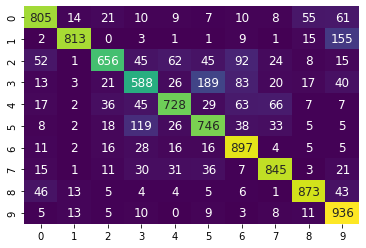

Normalized confusion matrix : 



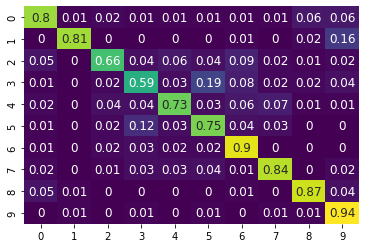

In [ ]:
# Confusion Matrix
y_pred = my_ViT_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

class_names = ["0", "1", "2", "3", "4","5", "6", "7", "8", "9"]

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))

# Function to draw confusion matrix
import seaborn as sns
def draw_confusion_matrix(true, preds, normalize=None):
  # Compute confusion matrix
  conf_matx = confusion_matrix(true, preds, normalize = normalize)
  conf_matx = np.round(conf_matx, 2)
  # print(conf_matx)

  # plt.subplots(figsize=(14,8))
  sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
  plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred)

print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred,"true")
